In [15]:
import numpy
from utils import display_np_arrays_as_images
display_np_arrays_as_images()

In [4]:
ims = numpy.load('./resources/test_images.npy', allow_pickle=False)
print(ims.shape, ims.dtype)  # 6 pics of 96 * 96 and 3 channel

(6, 96, 96, 3) float64


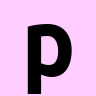

In [7]:
ims[4]

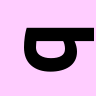

In [5]:
from einops import rearrange, reduce, repeat

# rearrange the elements in the image, h to w
# Note the channel is not touched 

rearrange(ims[4], 'h w c -> w h c')

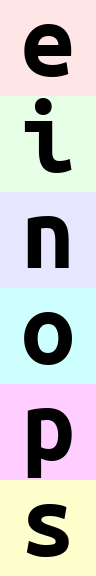

In [10]:
# composing batches and heights to new height dimension

rearrange(ims, 'b h w c -> (b h) w c')

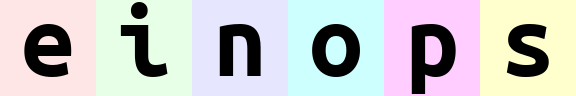

In [11]:
rearrange(ims, 'b h w c -> h (b w) c')

In [12]:
rearrange(ims, 'b h w c -> h (b w) c').shape

(96, 576, 3)

In [15]:
rearrange(ims, '(u1 u2) h w c -> u1 u2 h w c', u1=2).shape

(2, 3, 96, 96, 3)

In [13]:
# decomposition is breaking an axis into multiple
rearrange(ims, '(y1 y2) h w c -> (y1 h) (y2 w) c', y1=2).shape

(192, 288, 3)

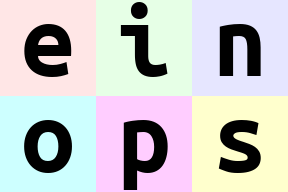

In [20]:
rearrange(ims, '(b1 b2) h w c -> (b1 h) (b2 w) c', b1=2)

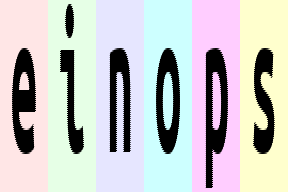

In [22]:
rearrange(ims, 'b h (w w2) c -> (h w2) (b w) c', w2=2)

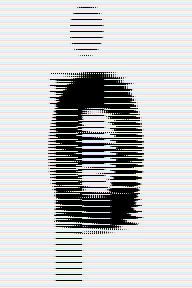

In [25]:
rearrange(ims, 'b (h h2) w c -> (h b) (w h2) c', h2=2)

### order of axes in composition is different
### rule is just as for digits in the number: leftmost digit is the most significant, 
### while neighboring numbers differ in the rightmost axis.

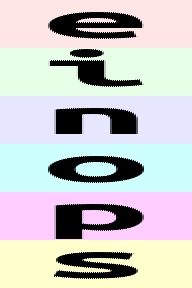

In [28]:
rearrange(ims, 'b (h h2) w c -> (b h) (w h2) c', h2=2)

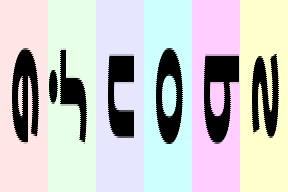

In [27]:
rearrange(ims, 'b (h h2) w c -> (w h2) (b h) c', h2=2)

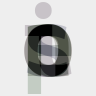

In [30]:
# reducing is easily visualised 
reduce(ims, 'b h w c -> h w c', 'mean')

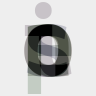

In [31]:
ims.mean(axis=0)  # not clear whats going on

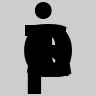

In [32]:
# getting the minimum provides the dark color
reduce(ims, 'b h w c -> h w', 'min')

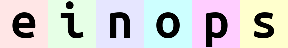

In [33]:
reduce(ims, 'b (h h2) (w w2) c -> h (b w) c', 'max', h2=2, w2=2)

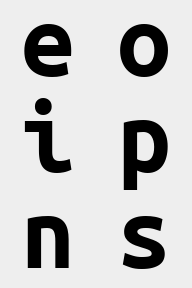

In [34]:
reduce(ims, '(b1 b2) h w c -> (b2 h) (b1 w)', 'mean', b1=2)

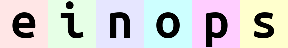

In [6]:
reduce(ims, 'b (h h2) (w w2) c -> h (b w) c', 'max', h2=2, w2=2)

In [7]:
type(ims[0])

numpy.ndarray

In [8]:
ims[0].shape

(96, 96, 3)

In [9]:
# new axis can appear in other place
rearrange(ims, 'b h w c -> h w c b')

<array of shape (96, 96, 3, 6)>


In [11]:
rearrange(ims, 'b h w c -> h (b w) c').shape

(96, 576, 3)

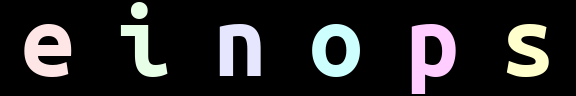

In [12]:
x = reduce(ims, 'b h w c -> b () () c', 'max') - ims
rearrange(x, 'b h w c -> h (b w) c')

In [13]:
repeat(ims[0], 'h w c -> h 5 w c')

<array of shape (96, 5, 96, 3)>


In [16]:
repeat(ims[0], 'h w c -> h 2 w c')

<array of shape (96, 2, 96, 3)>


In [17]:
repeat(ims[0], 'h w c -> h re w c', re=3)

<array of shape (96, 3, 96, 3)>


### Reduce ⇆ repeat

-> reduce and repeat are like opposite of each other: first one reduces amount of elements, second one increases.

In [21]:
import numpy as np
from utils import guess

x = np.random.RandomState(42).normal(size=[10, 32, 100, 200])
flavour = 'pytorch'

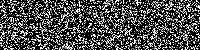

In [29]:
x[1][31][:50]

In [33]:
x[1][31][70:][:75]

In [35]:
import torch
x = torch.from_numpy(x)
x.requires_grad = True

In [36]:
type(x), x.shape

(torch.Tensor, torch.Size([10, 32, 100, 200]))

In [37]:
rearrange(x, 'b c h w -> b h w c').shape

torch.Size([10, 100, 200, 32])

In [39]:
# doing back propagation

y0 = x
y1 = reduce(y0, 'b c h w -> b c', 'max')
y2 = rearrange(y1, 'b c -> c b')
y3 = reduce(y2, 'c b -> ', 'sum')

In [40]:
y3

tensor(1285.4242, dtype=torch.float64, grad_fn=<ViewBackward0>)

In [41]:
y3.backward()
print(x.grad)

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],

         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],

         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],

         ...,

         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 

In [42]:
print(reduce(x.grad, 'b c h w -> ', 'sum'))

tensor(320., dtype=torch.float64)


In [43]:
from einops import asnumpy

y3_numpy = asnumpy(y3)
y3_numpy

array(1285.42419566)
<array of shape ()>


In [44]:
y = rearrange(x, 'b c h w -> b (c h w)')
guess(y.shape)

Answer is: (10, 640000) (hover to see)

In [45]:
y = rearrange(x, 'b c (h h1) (w w1) -> b (h1 w1 c) h w', h1=2, w1=2)
y.shape

torch.Size([10, 128, 50, 100])

In [46]:
y = reduce(x, 'b c (h h1) (w w1) -> b c h w', reduction='max', h1=2, w1=2)
y.shape

torch.Size([10, 32, 50, 100])

In [47]:
# you can skip names for reduced axes
y = reduce(x, 'b c (h 2) (w 2) -> b c h w', reduction='max')
y.shape

torch.Size([10, 32, 50, 100])

In [48]:
# models typically work only with batches, 
# so to predict a single image ...
image = rearrange(x[0, :3], 'c h w -> h w c')
# ... create a dummy 1-element axis ...
y = rearrange(image, 'h w c -> () c h w')
# ... imagine you predicted this with a convolutional network for classification,
# we'll just flatten axes ...
predictions = rearrange(y, 'b c h w -> b (c h w)')
# ... finally, decompose (remove) dummy axis
predictions = rearrange(predictions, '() classes -> classes')
# alternatively, you can use just 1 to introduce new axis, that's a synonym to ()


In [49]:
y = x - reduce(x, 'b c h w -> b c 1 1', 'mean')
guess(y.shape)

Answer is: (10, 32, 100, 200) (hover to see)

In [50]:
y = x - reduce(y, 'b c h w -> 1 c 1 1', 'mean')
guess(y.shape)

Answer is: (10, 32, 100, 200) (hover to see)

In [51]:
# or maybe stack along last dimension?
tensors = rearrange(ims, 'b c h w -> h w c b')
guess(tensors.shape)

Answer is: (96, 3, 96, 6) (hover to see)

In [53]:
y = rearrange(x, 'b (g1 g2 c) h w-> b (g2 g1 c) h w', g1=4, g2=4)
guess(y.shape)

Answer is: (10, 32, 100, 200) (hover to see)

In [55]:
from einops import parse_shape

parse_shape(x, 'd a _ e')

{'d': 10, 'a': 32, 'e': 200}

In [56]:
# each image is split into subgrids, each subgrid now is a separate "image"
y = rearrange(x, 'b c (h hs) (w ws) -> (hs ws b) c h w', hs=2, ws=2)
# y = convolve_2d(y)
# pack subgrids back to an image
y = rearrange(y, '(hs ws b) c h w -> b c (h hs) (w ws)', hs=2, ws=2)

# assert y.shape == x.shape

In [57]:
from einops.layers.torch import Rearrange, Reduce
from torch.nn import Sequential, Conv2d, MaxPool2d, Linear, ReLU

In [58]:
model = Sequential(
    Conv2d(3, 6, kernel_size=5),
    MaxPool2d(kernel_size=2),
    Conv2d(6, 16, kernel_size=5),
    Reduce('b c (h 2) (w 2) -> b (c h w)', 'max'),
    Linear(16*5*5, 120),
    ReLU(),
    Linear(120, 10)
)

In [59]:
# other stuff we use
import torch
from torch import nn
from einops.layers.torch import Rearrange, Reduce

In [60]:
# No norm layer
class Affine(nn.Module):
    def __init__(self, dim):
        super().__init__()
        self.alpha = nn.Parameter(torch.ones(dim))
        self.beta = nn.Parameter(torch.zeros(dim))
        
    def forward(self, x):
        return self.alpha * x + self.beta
    

class Mlp(nn.Module):
    def __init__(self, dim):
        super().__init__()
        self.fc1 = nn.Linear(dim, 4 * dim)
        self.act = nn.GELU()
        self.fc2 = nn.Linear(4 * dim, dim)
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.act(x)
        x = self.fc2(x)
        return x
    
class ResMLP_Blocks(nn.Module):
    def __init__(self, nb_patches, dim, layerscale_init):
        super().__init__()
        self.affine_1 = Affine(dim)
        self.affine_2 = Affine(dim)
        self.linear_patches = nn.Linear(nb_patches, nb_patches) #Linear layer on patches
        self.mlp_channels = Mlp(dim) #MLP on channels
        self.layerscale_1 = nn.Parameter(layerscale_init * torch.ones((dim))) # LayerScale
        self.layerscale_2 = nn.Parameter(layerscale_init * torch.ones((dim))) # parameters
        
    def forward(self, x):
        res_1 = self.linear_patches(self.affine_1(x).transpose(1,2)).transpose(1,2)
        x = x + self.layerscale_1 * res_1
        res_2 = self.mlp_channels(self.affine_2(x))
        x = x + self.layerscale_2 * res_2
        return x